In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
identity = np.array([[0.,0.,0.],
                     [0.,1.,0.],
                     [0.,0.,0.]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])

gaussian_5x5 = (1/256.0)*np.array([[1., 4., 6., 4., 1.],
                                   [4., 16., 24., 16., 4.],
                                   [6., 24., 36., 24., 6.],
                                   [4., 16., 24., 16., 4.],
                                   ])
# for edges in X axis
sobel_edge_kernel_x = np.array([[1., 2., 1.],
                              [0., 0., 0.],
                              [-1., -2., -1]])
# for edges in Y axis
sobel_edge_kernel_y = np.array([[1., 0., -1.],
                              [2., 0., -2.],
                              [1., 0., -1.]])

median = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])

mean = (1/9)*np.array([[1,1,1],
                 [1,1,1],
                 [1,1,1]])

Laplacian_gaussain = np.array([[0,1,0],
                              [1,-4,1],
                              [0,1,0]])

edge_enhancement = np.array([[-1,-1,-1],
                             [-1,8,-1],
                             [-1,-1,-1]])

robert_cross_1 = np.array([[1,0],
                           [0,-1]])

robert_cross_2 = np.array([[-1,0],
                           [0,1]])

In [3]:
def convoperation(image, kernels):
    result= np.copy(image)
    for kernel in kernels:
        result = cv2.filter2D(result, -1, kernel)
    return result

In [4]:
def color_segmentation(image):
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    lower_yellow = np.array([165, 157, 0], dtype=np.uint8)
    upper_yellow = np.array([255, 255, 155], dtype=np.uint8)

    lower_white = np.array([200, 200, 200], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    mask_yellow = cv2.inRange(rgb, lower_yellow, upper_yellow)
    mask_white = cv2.inRange(rgb, lower_white, upper_white)

    combined_mask = cv2.bitwise_or(mask_yellow, mask_white)

    segmented_image = cv2.bitwise_and(image, image, mask=combined_mask)

    return segmented_image

In [5]:
# def regein_of_interest(frame):
#     (height, width, _) = frame.shape
#     tl = [width//2.3,height//1.7]
#     bl = [width//6,height]
#     tr = [width//1.8,height//1.7]
#     br = [width,height]
#     pt1 = np.float32([tl,bl,tr,br])
#     pt2 = np.float32([[0,0],[0,480],[640,0],[640,480]])
#     matrix = cv2.getPerspectiveTransform(pt1,pt2)
#     f = cv2.warpPerspective(frame,matrix,(640,480))
#     plt.imshow(f)
#     return f

In [6]:
def warp(img):
    img_size = (img.shape[1], img.shape[0])

    pt1 = np.float32([[685, 450],
          [1090, 710],
          [220, 710],
          [595, 450]])

    pt2 = np.float32(
        [[900, 0],
          [900, 710],
          [250, 710],
          [250, 0]])

    M = cv2.getPerspectiveTransform(pt1, pt2)
    Minv = cv2.getPerspectiveTransform(pt2, pt1)

    binary_warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return binary_warped, Minv

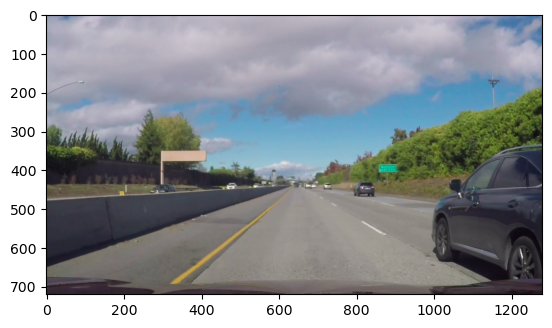

In [7]:
image = cv2.imread("testing/parllerl_lanes.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [8]:
# video = cv2.VideoCapture("videos/project_video.mp4")
video = cv2.VideoCapture("videos/harder_challenge_video.mp4")
# video = cv2.VideoCapture("videos/challenge_video.mp4")
while True:
    ret, frame = video.read()
    if not ret:
        break
    wrapped,wrap2= warp(frame)
    f = color_segmentation(wrapped)
    kerenel_edge = convoperation(frame,[Laplacian_gaussain])
    cv2.imshow('Video', frame)
    # cv2.imshow('kernel',kerenel_edge)
    cv2.imshow('wrapped',wrapped)
    cv2.imshow('color',f)
    # cv2.imshow('wrapped2',wrap2)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x3784a50) is not the object's thread (0x3632b10).
Cannot move to target thread (0x3784a50)

QObject::moveToThread: Current thread (0x3784a50) is not the object's thread (0x3632b10).
Cannot move to target thread (0x3784a50)

QObject::moveToThread: Current thread (0x3784a50) is not the object's thread (0x3632b10).
Cannot move to target thread (0x3784a50)

QObject::moveToThread: Current thread (0x3784a50) is not the object's thread (0x3632b10).
Cannot move to target thread (0x3784a50)

QObject::moveToThread: Current thread (0x3784a50) is not the object's thread (0x3632b10).
Cannot move to target thread (0x3784a50)

QObject::moveToThread: Current thread (0x3784a50) is not the object's thread (0x3632b10).
Cannot move to target thread (0x3784a50)

QObject::moveToThread: Current thread (0x3784a50) is not the object's thread (0x3632b10).
Cannot move to target thread (0x3784a50)

QObject::moveToThread: Current thread (0x3784a50) is not the object's thread